In [1]:
require 'narray'
require 'daru'
require 'gnuplotrb'
include Daru
include GnuplotRB
nil

"if(window['d3'] === undefined ||\n   window['Nyaplot'] === undefined){\n    var path = {\"d3\":\"https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.5/d3.min\",\"downloadable\":\"http://cdn.rawgit.com/domitry/d3-downloadable/master/d3-downloadable\"};\n\n\n\n    var shim = {\"d3\":{\"exports\":\"d3\"},\"downloadable\":{\"exports\":\"downloadable\"}};\n\n    require.config({paths: path, shim:shim});\n\n\nrequire(['d3'], function(d3){window['d3']=d3;console.log('finished loading d3');require(['downloadable'], function(downloadable){window['downloadable']=downloadable;console.log('finished loading downloadable');\n\n\tvar script = d3.select(\"head\")\n\t    .append(\"script\")\n\t    .attr(\"src\", \"http://cdn.rawgit.com/domitry/Nyaplotjs/master/release/nyaplot.js\")\n\t    .attr(\"async\", true);\n\n\tscript[0][0].onload = script[0][0].onreadystatechange = function(){\n\n\n\t    var event = document.createEvent(\"HTMLEvents\");\n\t    event.initEvent(\"load_nyaplot\",false,false);\n\t    win

# Variables

In [2]:
input = "../DOAS/20160205.csv"
nil

In [3]:
d = DataFrame.from_csv(input)
d.vectors = Index.new(d.vectors.to_a.map{|i| i.to_sym})
d.index = DateTimeIndex.new(d[:timestamp])
d.head

,h2o,h2o_err,index,no,no2,no2_err,nox,nox_err,timestamp
2016-02-05T10:48:34+01:00,2874022.19587452,783909.203624575,0,,,,25.3409262836529,0.0572910838379751,2016-02-05T10:48:34+01:00
2016-02-05T10:49:06+01:00,4776892.87451518,793597.481772393,1,,,,27.3673887712477,0.0581320369525711,2016-02-05T10:49:06+01:00
2016-02-05T10:49:37+01:00,4385721.52826022,867817.796365954,2,,,,29.6438776705571,0.0638825336687235,2016-02-05T10:49:37+01:00
2016-02-05T10:50:03+01:00,5549990.6503493255,1663821.3314068762,3,,21.691311672109638,0.11424666497441313,,,2016-02-05T10:50:03+01:00
2016-02-05T10:50:06+01:00,6620686.133837664,1534810.9999819768,4,,21.45944741974013,0.10536098534784917,,,2016-02-05T10:50:06+01:00
2016-02-05T10:50:08+01:00,4427755.35169995,833315.866762187,5,8.741357827812951,,,30.2740891706576,0.0614080270589361,2016-02-05T10:50:08+01:00
2016-02-05T10:50:09+01:00,7409748.335078269,1516246.0929638648,6,,21.56937330439691,0.10409667702226579,,,2016-02-05T10:50:09+01:00
2016-02-05T10:50:11+01:00,6385412.705707441,1483689.9440891608,7,,21.815957774923486,0.10189349836919777,,,2016-02-05T10:50:11+01:00
2016-02-05T10:50:13+01:00,7820346.273248133,1517050.803881984,8,,22.314554529618494,0.10423846815461105,,,2016-02-05T10:50:13+01:00
2016-02-05T10:50:16+01:00,6496970.735408757,1504821.777737824,9,,22.775861600718187,0.10344994141341828,,,2016-02-05T10:50:16+01:00


# Plots

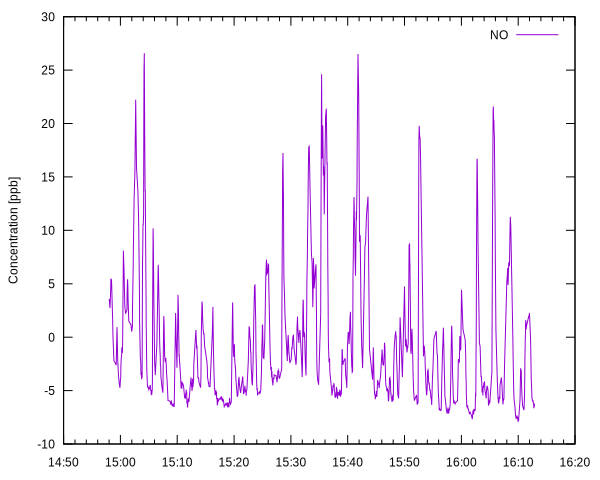

In [12]:
Plot.new(
  [d.row["2016-02-05 14:58:00+01:00".."2016-02-05 16:13:00+01:00"][:no], with: "lines", title: "NO"],
  ylabel: "Concentration [ppb]",
  format_x: "%H:%M",
  )

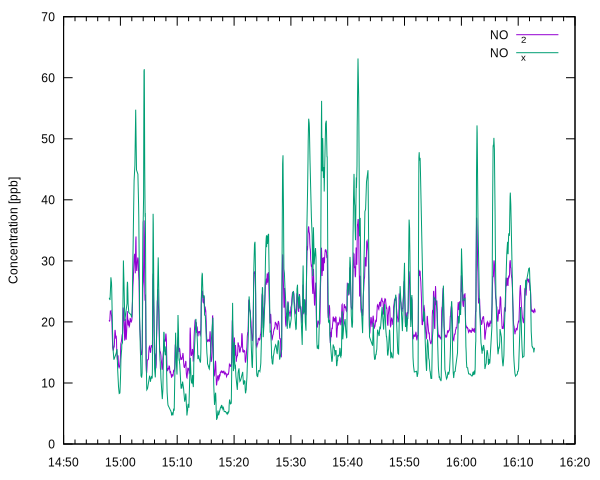

In [13]:
Plot.new(
  [d.row["2016-02-05 14:58:00+01:00".."2016-02-05 16:13:00+01:00"][:no2], with: "lines", title: "NO_2"],
  [d.row["2016-02-05 14:58:00+01:00".."2016-02-05 16:13:00+01:00"][:nox], with: "lines", title: "NO_x"],
  ylabel: "Concentration [ppb]",
  format_x: "%H:%M",
  )

In [16]:
no2 = d.where(d[:nox].eq(nil)).row["2016-02-05 15:00:00+01:00".."2016-02-05 16:00:00+01:00"][:no2].mean
nox = d.where(d[:no2].eq(nil)).row["2016-02-05 15:00:00+01:00".."2016-02-05 16:00:00+01:00"][:nox].mean
puts nox - no2

-0.7080715421770378


In [23]:
tmp = (d.where(d[:no2].eq(nil))[:no] + 0.0844276)/0.894501

#<Daru::Vector:44028560 @name = nil @size = 5064 >
                                      nil
2016-02-05T10:48:34+                  nil
2016-02-05T10:49:06+                  nil
2016-02-05T10:49:37+                  nil
2016-02-05T10:50:08+    9.866713874901148
2016-02-05T10:50:39+    9.297658601179416
2016-02-05T10:52:04+    71.11549164686504
2016-02-05T10:53:06+   19.579534678201245
2016-02-05T10:54:08+    6.437110205785398
2016-02-05T10:55:10+   29.087268704115573
2016-02-05T10:56:12+    86.56619292313745
2016-02-05T10:56:43+    54.96435652132647
2016-02-05T10:57:45+   12.885285500740803
2016-02-05T10:58:47+   246.29913912600563
2016-02-05T10:59:18+    72.40433380482644
2016-02-05T10:59:50+   119.36150887877683
2016-02-05T11:01:08+   126.20477931758386
2016-02-05T11:01:17+   114.07087786611739
                 ...                  ...

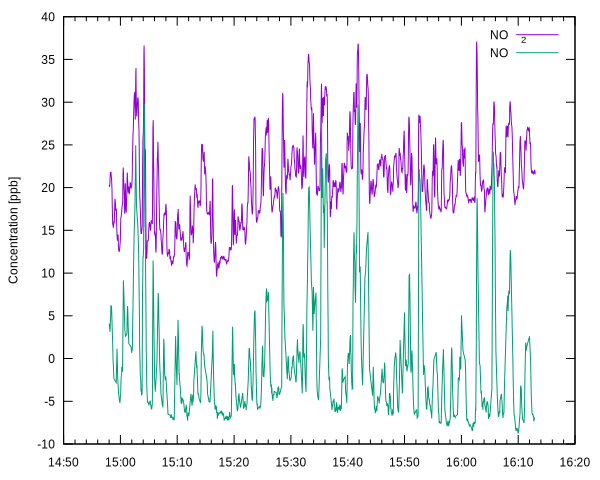

In [24]:
Plot.new(
  [d.row["2016-02-05 14:58:00+01:00".."2016-02-05 16:13:00+01:00"][:no2], with: "lines", title: "NO_2"],
  [tmp["2016-02-05 14:58:00+01:00".."2016-02-05 16:13:00+01:00"], with: "lines", title: "NO"],
  ylabel: "Concentration [ppb]",
  format_x: "%H:%M",
  )

In [22]:
no2 = d.row["2016-02-05 14:58:00+01:00".."2016-02-05 16:13:00+01:00"][:no2].mean
nox = tmp["2016-02-05 14:58:00+01:00".."2016-02-05 16:13:00+01:00"].mean
nox -no2

1.5919755062005478

In [26]:
tmp["2016-02-05 14:58:00+01:00".."2016-02-05 16:13:00+01:00"].mean

-0.7729209640138941